In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
np.random.seed(0)
data_size = 1000

temperature = np.random.uniform(low=-10.0, high=50.0, size=data_size)
pressure = np.random.uniform(low=50000.0, high=120000.0, size=data_size)
humidity = np.random.uniform(low=0.0, high=100.0, size=data_size)

df = pd.DataFrame({
    'temperature': temperature,
    'pressure': pressure,
    'humidity': humidity
})

df.head()


,temperature,pressure,humidity
0,22.928810,91501.618955,81.151847
1,32.911362,50704.458696,47.608399
2,26.165803,83307.833710,52.315599
3,22.692991,99613.927366,25.052059
4,15.419288,53078.280242,60.504302


In [4]:
df['class'] = np.where(
    (df['temperature'] < 27) & (df['pressure'].between(50000, 102000)) & (df['humidity'] < 60), 
    1, 
    0
)

In [5]:
df.head(20)

,temperature,pressure,humidity,class
0,22.928810,91501.618955,81.151847,0
1,32.911362,50704.458696,47.608399,0
2,26.165803,83307.833710,52.315599,1
3,22.692991,99613.927366,25.052059,1
4,15.419288,53078.280242,60.504302,0
5,28.753647,111566.503812,30.290481,0
6,16.255233,86405.699164,57.728401,1
7,43.506380,52146.273383,16.967812,0
8,47.819766,65708.952834,15.946909,0
9,13.006491,116757.298750,41.702974,0


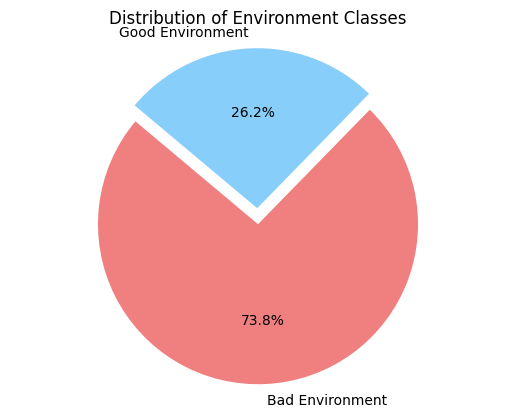

In [6]:
import matplotlib.pyplot as plt

class_counts = df['class'].value_counts()
labels = ['Bad Environment', 'Good Environment']
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  

plt.pie(class_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Distribution of Environment Classes')
plt.axis('equal')  
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

X = df[['temperature', 'pressure', 'humidity']].values
y = df['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_balanced = scaler.fit_transform(X_train_balanced)
X_test = scaler.transform(X_test)

In [9]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(3,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid') # binarna klasifikacija
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                256       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2369 (9.25 KB)
Trainable params: 2369 (9.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
history = model.fit(X_train_balanced, y_train_balanced, epochs=20, validation_split=0.2, verbose=1)

Epoch 1/20


30/30 [==============================] - 2s 12ms/step - loss: 0.2020 - accuracy: 0.7374 - val_loss: 0.1952 - val_accuracy: 0.7521
Epoch 2/20
30/30 [==============================] - 0s 4ms/step - loss: 0.1050 - accuracy: 0.8971 - val_loss: 0.1412 - val_accuracy: 0.8571
Epoch 3/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0788 - accuracy: 0.9118 - val_loss: 0.1193 - val_accuracy: 0.8445
Epoch 4/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0671 - accuracy: 0.9149 - val_loss: 0.1022 - val_accuracy: 0.8697
Epoch 5/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0592 - accuracy: 0.9244 - val_loss: 0.0896 - val_accuracy: 0.8908
Epoch 6/20
30/30 [==============================] - 0s 4ms/step - loss: 0.0526 - accuracy: 0.9307 - val_loss: 0.0766 - val_accuracy: 0.9076
Epoch 7/20
30/30 [==============================] - 0s 5ms/step - loss: 0.0465 - accuracy: 0.9391 - val_loss: 0.0618 - val_accuracy: 0.9244
Epoch 8/20
30/30 

In [12]:
predictions = model.predict(X_test)

print(predictions)

7/7 [==============================] - 0s 2ms/step
[[5.02871983e-02]
 [1.46607414e-01]
 [9.45225000e-01]
 [9.44689214e-01]
 [9.04474128e-03]
 [8.23155761e-01]
 [2.80615408e-03]
 [2.67896568e-03]
 [4.67370613e-04]
 [8.84717051e-03]
 [1.75212650e-03]
 [7.07027137e-01]
 [2.98272073e-01]
 [9.65997398e-01]
 [5.93600515e-03]
 [7.46683180e-01]
 [9.75217521e-01]
 [2.66130548e-04]
 [3.52150910e-02]
 [4.23225621e-03]
 [5.98239596e-04]
 [7.11851462e-04]
 [4.17318165e-01]
 [1.24421157e-03]
 [1.13975140e-04]
 [9.93270159e-01]
 [1.28648616e-02]
 [6.16611028e-03]
 [2.56895903e-03]
 [9.97916639e-01]
 [9.62650359e-01]
 [3.77489597e-01]
 [1.62515752e-02]
 [5.47735579e-02]
 [1.18621729e-01]
 [9.99934137e-01]
 [2.72080868e-01]
 [7.25282431e-02]
 [5.17779887e-01]
 [9.85795021e-01]
 [1.12224172e-03]
 [3.48614343e-02]
 [6.32014096e-01]
 [1.09533445e-04]
 [4.60147538e-04]
 [1.60706323e-02]
 [5.85160479e-02]
 [2.95496404e-01]
 [6.45731390e-02]
 [9.96395469e-01]
 [3.07961972e-03]
 [4.45642062e-02]
 [3.66504192e

In [73]:
test_loss, test_mae = model.evaluate(X_test, y_test)

print(f'Test MAE: {test_mae}')

7/7 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9750
Test MAE: 0.9750000238418579


In [76]:
model.save('env_model.h5')

c:\Users\Emma\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [77]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open('env_model.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Emma\AppData\Local\Temp\tmp0nqmyo5v\assets


INFO:tensorflow:Assets written to: C:\Users\Emma\AppData\Local\Temp\tmp0nqmyo5v\assets
